In [6]:
import matplotlib.pyplot as plt
import ast
import numpy as np
import pandas as pd
plt.style.use('bmh')

In [7]:
def readData(file,flag=False):
    x = []
    y = []
    if flag:
        with open(file) as f:
            lines = f.readlines()
            for item in lines:
                item = ast.literal_eval(item)
                x.append(item['edges'])
                y.append(item['distance'])
        return x,y

    else:
        with open(file) as f:
            lines = f.readlines()
            for item in lines:
                item = ast.literal_eval(item)
                x.append(item['distance'])
                y.append(item['count'])
        return x,y

x1 = []
x2 = []
x3 = []
y1 = []
y2 = []
y3 = []

x1,y1 = readData('../data/data1.txt')
x2,y2 = readData('../data/data2.txt')
x3,y3 = readData('../data/data3.txt')

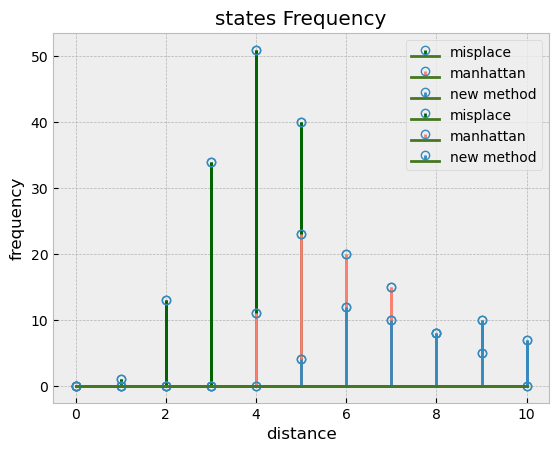

In [8]:
markerline, stemlines, baseline = plt.stem(x1, y1, linefmt='darkgreen', label="misplace")
markerline.set_markerfacecolor('none')
markerline, stemlines, baseline = plt.stem(x2, y2, linefmt='salmon', label="manhattan")
markerline.set_markerfacecolor('none')
markerline, stemlines, baseline = plt.stem(x3, y3, label="new method")
markerline.set_markerfacecolor('none')
plt.xlabel('distance')
plt.ylabel('frequency')
plt.title("states Frequency")
plt.legend()
plt.show()

In [9]:
x1 = []
x2 = []
x3 = []
y1 = []
y2 = []
y3 = []

x1,y1 = readData('../data/edges1.txt',True)
x2,y2 = readData('../data/edges2.txt',True)
x3,y3 = readData('../data/edges3.txt',True)




mu, sigma = 200, 25
np.random.seed(365)
x1 = mu + sigma*np.random.randn(990, 1)
x2 = mu + sigma*np.random.randn(980, 1)
x3 = mu + sigma*np.random.randn(1000, 1)

# create the dataframe; enumerate is used to make column names
df = pd.concat([pd.DataFrame(a, columns=['opposite','same','agree']) for i, a in enumerate([x1, x2, x3], 1)], axis=1)

# plot the data
df.plot.hist(stacked=True, bins=30, density=True, figsize=(10, 6), grid=True)

ValueError: Shape of passed values is (990, 1), indices imply (990, 3)

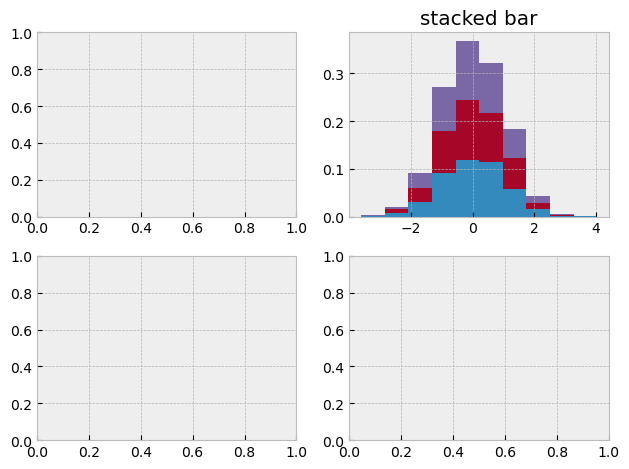

In [10]:
temp_x = []
temp_y = []

x=x3
y=y3
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)


ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

fig.tight_layout()
plt.show()


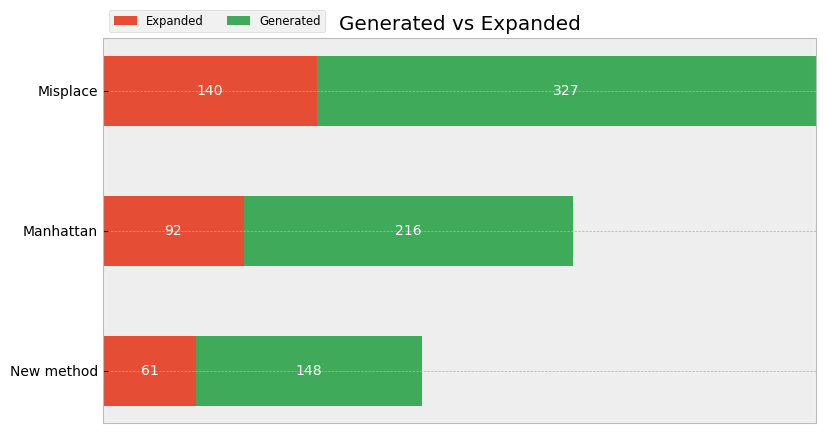

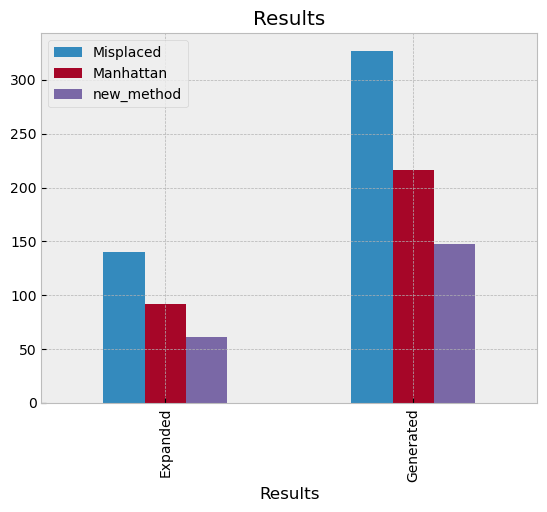

In [11]:

import numpy as np
category_names = ['Expanded', 'Generated']
results = {
    'Misplace': [140,327],
    'Manhattan': [92,216],
    'New method': [61,148]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(results, category_names)
plt.title('Generated vs Expanded')
plt.show()


# create data
df = pd.DataFrame([['Expanded', 140, 92, 61], ['Generated', 327, 216, 148]],
                  columns=['Results', 'Misplaced', 'Manhattan', 'new_method'])
# view data
ax = df.plot(x='Results',
             kind='bar',
             stacked=False,
             title='Results')

plt.show()